# Part I - Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data Cleaning
5. Data visualization

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

---

## 2. Loading data with Pandas

We need to load `amazon_sales_clean.csv` into individual dataframes so that we can work with them in Python.

In [2]:
df = pd.read_csv("Amazon_sales.csv", index_col=False, parse_dates=['date'])

Let's look at the first 5 rows of both dataframes to see what the data looks like.

In [3]:
df.head()

,Unnamed: 0,date,status,fulfilment,sales_channel,ship_service_level,category,size,amazon_standard_id,qty,currency,sales,ship_state,clean_ship_state,promotion_used
0,2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B07WV4JV4D,1,INR,329.0,MAHARASHTRA,Maharashtra,True
1,4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,B098714BZP,1,INR,574.0,TAMIL NADU,Tamil Nadu,False
2,5,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,XL,B08YN7XDSG,1,INR,824.0,UTTAR PRADESH,Uttar Pradesh,True
3,6,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,L,B08CMHNWBN,1,INR,653.0,CHANDIGARH,Chandigarh,True
4,9,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XXL,B08B3XF5MH,1,INR,363.0,TAMIL NADU,Tamil Nadu,False


With the data above, we have a mix of numeric and categorical data, also we have NaN values which we will need to handle later.

---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that we're dealing with along with the data types of each column. The data types may dictate how we transform and engineer features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77785 entries, 0 to 77784
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          77785 non-null  int64         
 1   date                77785 non-null  datetime64[ns]
 2   status              77785 non-null  object        
 3   fulfilment          77785 non-null  object        
 4   sales_channel       77785 non-null  object        
 5   ship_service_level  77785 non-null  object        
 6   category            77785 non-null  object        
 7   size                77785 non-null  object        
 8   amazon_standard_id  77785 non-null  object        
 9   qty                 77785 non-null  int64         
 10  currency            77577 non-null  object        
 11  sales               77577 non-null  float64       
 12  ship_state          77785 non-null  object        
 13  clean_ship_state    77785 non-null  object    

We can see that there is an unexpected column named `Unnamed: 0`, which can be dropped later. The `date` column is already in datetime format, so no further processing is needed for this column. There are two redundant columns : `ship_state` and `clean_ship_state`, so we will drop one of them. Other than that, the remaining columns appear to be in good shape.

### Statistics

Now let's look at some statistics about the datasets

In [5]:
num_col = ['qty', 'sales']
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
qty,77785.0,1.002635,0.105543,0.0,1.0,1.0,1.0,15.0
sales,77577.0,648.538149,282.432386,0.0,442.0,599.0,788.0,5584.0


The describe method gives us a lot of information about the data. The key point to take away from this are that 1) we have highly skewed data, as exhibited by the percentile values and 2) there is no negative value which means the number is valid.

---

## 4. Data cleaning

### Copy data

Before we clean our data, better to copy the original dataset.

In [6]:
data = df.copy()

### Check Error Values in Sales

In [7]:
sales_error = data[(data['sales']==0 )]
sales_error

,Unnamed: 0,date,status,fulfilment,sales_channel,ship_service_level,category,size,amazon_standard_id,qty,currency,sales,ship_state,clean_ship_state,promotion_used
267,385,2022-04-30,Shipped,Amazon,Amazon.in,Standard,kurta,L,B081WSCKPQ,1,INR,0.0,WEST BENGAL,West Bengal,False
273,392,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,L,B09QJM9NDP,1,INR,0.0,MAHARASHTRA,Maharashtra,False
307,436,2022-04-30,Shipped,Amazon,Amazon.in,Standard,Set,XXL,B07JPDGGHY,1,INR,0.0,UTTAR PRADESH,Uttar Pradesh,False
313,446,2022-04-30,Shipped,Amazon,Amazon.in,Standard,Set,L,B09NQ44RNV,1,INR,0.0,MAHARASHTRA,Maharashtra,False
315,449,2022-04-30,Shipped,Amazon,Amazon.in,Standard,Set,XL,B08QGKHDN3,1,INR,0.0,JHARKHAND,Jharkhand,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77470,128508,2022-06-01,Shipped,Amazon,Amazon.in,Standard,Set,L,B0922S6GWB,1,INR,0.0,CHHATTISGARH,Chhattisgarh,False
77495,128547,2022-06-01,Shipped,Amazon,Amazon.in,Standard,Western Dress,XL,B09SDXRYBG,1,INR,0.0,WEST BENGAL,West Bengal,False
77497,128550,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,Set,L,B09NDKQD88,1,INR,0.0,TAMIL NADU,Tamil Nadu,False
77588,128685,2022-06-01,Shipped,Amazon,Amazon.in,Standard,Western Dress,M,B09831YHGV,1,INR,0.0,PUNJAB,Punjab,False


We can see that the zero value in the `sales` column seem unusual, as all of the data represent orders that have already shipped. So it will be imputed with values from sales in similar category, size, and quantity.

In [8]:
# value imputation

# Step 1: Lookup table --> get transactions with sales == 0
lookup_sales = data[data['sales'] > 0].groupby(['category', 'size', 'qty'])['sales'].first().reset_index()
lookup_sales.rename(columns={'sales': 'lookup_sales'}, inplace=True)

# Step 2: Merge into the data
data = data.merge(lookup_sales, on=['category', 'size', 'qty'], how='left')

# Step 3: Imputation
data['sales'] = data.apply(
    lambda row: row['lookup_sales'] if row['sales'] == 0 and pd.notnull(row['lookup_sales']) else row['sales'],
    axis=1
)

# Step 4: Drop dummy column
data = data.drop(columns='lookup_sales')


### Check Error Values in Qty

In [9]:
qty_error = data[(data['qty']==0 )]
qty_error

,Unnamed: 0,date,status,fulfilment,sales_channel,ship_service_level,category,size,amazon_standard_id,qty,currency,sales,ship_state,clean_ship_state,promotion_used
1099,1615,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,kurta,M,B08XW581QN,0,NaN,NaN,UTTARAKHAND,Uttarakhand,True
1357,1989,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Set,S,B08MYV5CHK,0,NaN,NaN,HARYANA,Haryana,True
1640,2424,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Set,S,B09NQ47F17,0,NaN,NaN,Rajshthan,Rajasthan,True
1889,2819,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B07R4XJNW3,0,NaN,NaN,TAMIL NADU,Tamil Nadu,True
5114,9255,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,Set,S,B09QJ5LYDH,0,NaN,NaN,TELANGANA,Telangana,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,119790,2022-06-07,Shipped,Amazon,Amazon.in,Expedited,Set,L,B08RJBQSMG,0,NaN,NaN,UTTARAKHAND,Uttarakhand,True
73046,121807,2022-06-05,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B09SDYHWLX,0,NaN,NaN,KARNATAKA,Karnataka,True
73327,122220,2022-06-05,Shipped,Amazon,Amazon.in,Expedited,kurta,S,B099FB1LY3,0,NaN,NaN,GOA,Goa,True
73851,123006,2022-06-05,Shipped,Amazon,Amazon.in,Expedited,kurta,3XL,B099FD9VJ2,0,NaN,NaN,TAMIL NADU,Tamil Nadu,False


Similar to the previous issues, the zero values in the 'qty' columns also seem unusual, as all of the data represent orders that have already been shipped. This column should contain values greater than zero, so these records with zero values need to be removed.

### Drop columns

We have 2 columns: `Unnamed: 0` and `ship_state` which we don't need for this project, so we will drop that.

In [10]:
data = data.drop(qty_error.index)
data = data.drop(columns=['Unnamed: 0', 'ship_state'])

### Missing values

We need to check missing values to select the best method for handling missing values.

In [11]:
data.isnull().sum()

date                    0
status                  0
fulfilment              0
sales_channel           0
ship_service_level      0
category                0
size                    0
amazon_standard_id      0
qty                     0
currency              115
sales                 115
clean_ship_state        0
promotion_used          0
dtype: int64

From the data above, there are 2 columns which have missing values. We will handle it one by one.

#### currency column

In `currency` column, we will fill all missing values with `INR` since the data is about Amazon - India.

In [12]:
data['currency'] = data['currency'].fillna(value='INR')

#### sales column

In `sales` column, before filling all missing values, we will explore first.

In [13]:
# define missing per day variable
missing_per_day = data[data['sales'].isnull()].groupby('date').size()

In [14]:
# look at 5 first row
missing_per_day.head()

date
2022-04-04    1
2022-04-06    4
2022-04-09    9
2022-04-14    1
2022-04-18    1
dtype: int64

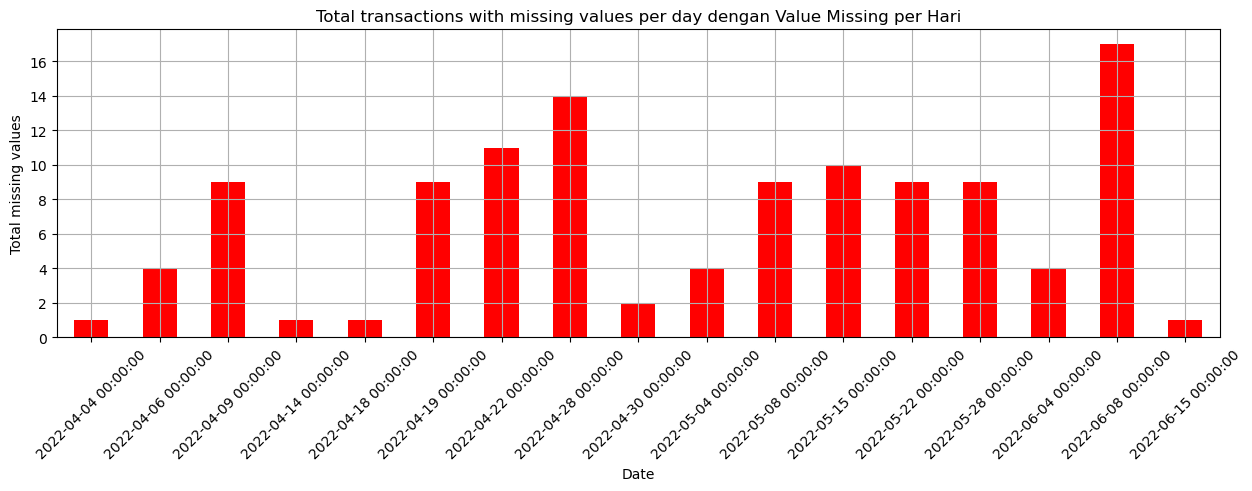

In [15]:
# plot into bar chart
plt.figure(figsize=(15, 4))
missing_per_day.plot(kind='bar', color='red')
plt.title('Total transactions with missing values per day dengan Value Missing per Hari')
plt.xlabel('Date')
plt.ylabel('Total missing values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The key point to take away from the chart above is that the number of missing values per day varies and is not consistent from day to day. Additionally, missing values do not occur every single day.

In [16]:
# fill missing values using median

data['sales'] = data.groupby('date')['sales'].transform(lambda x: x.fillna(x.median()))

Since we have fluctuative data in missing values and non-linear, then we fill the missing values using median value.

### Save data for modelling

In [17]:
data.to_csv('data_for_modelling.csv', index=False)

Overall the data looks good now.

---

## 5. Data visualization

Now let's dive a bit deeper into the dataframes

### Sales trend

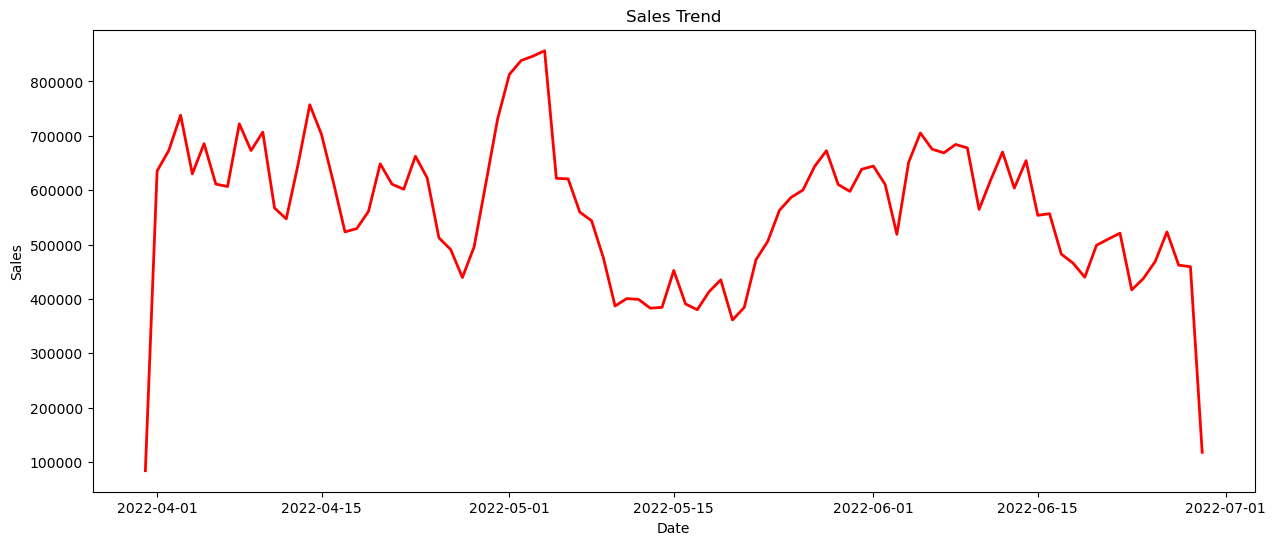

In [18]:
# how's the trend of sales

data_trend = data.groupby('date')['sales'].sum()

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_trend.index, data_trend, color='red', linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend')

# Show the plot
plt.show()

The chart above shows a decreasing trend over time.

### Decompose trend, season, and residual

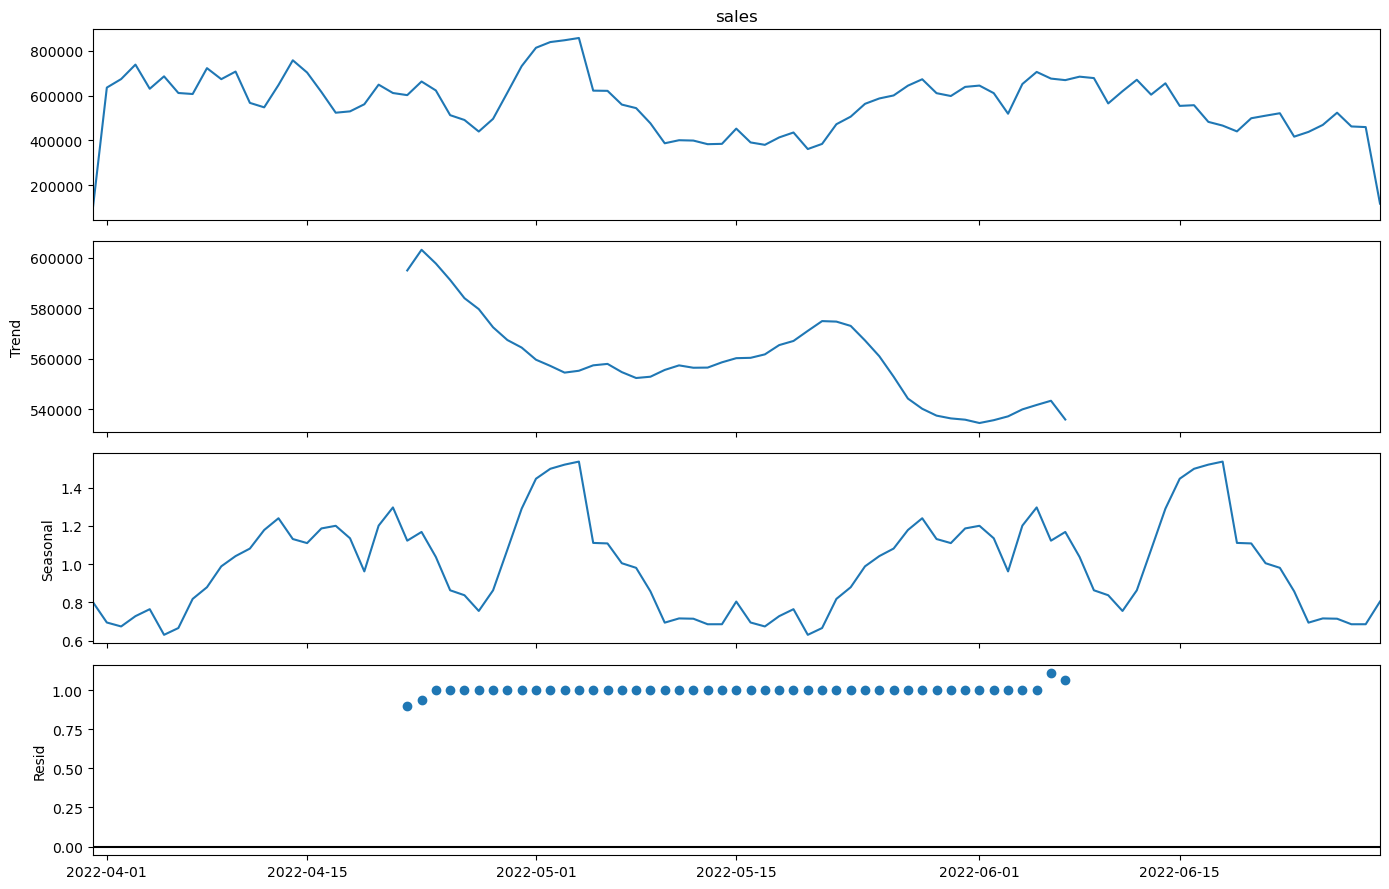

In [19]:
# Decompose the components from the time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_trend, model='multiplicative', period=45)
ax=res.plot()
plt.show()


As mentioned earlier, the trend is decreasing. There appears to be a seasonal pattern occurring approximately every 1.5 months or 45 days (March 31st and May 15th).

From the residual plot, we can see that the residual values are centered around 1, rather than zero. This suggests that there are components in the data that are not explained by the identified trend and seasonality. In other words, the decomposition leaves behind some unexplained variation, which could be noise or other hidden patterns not captured in the current decomposition.

### Top sales by category

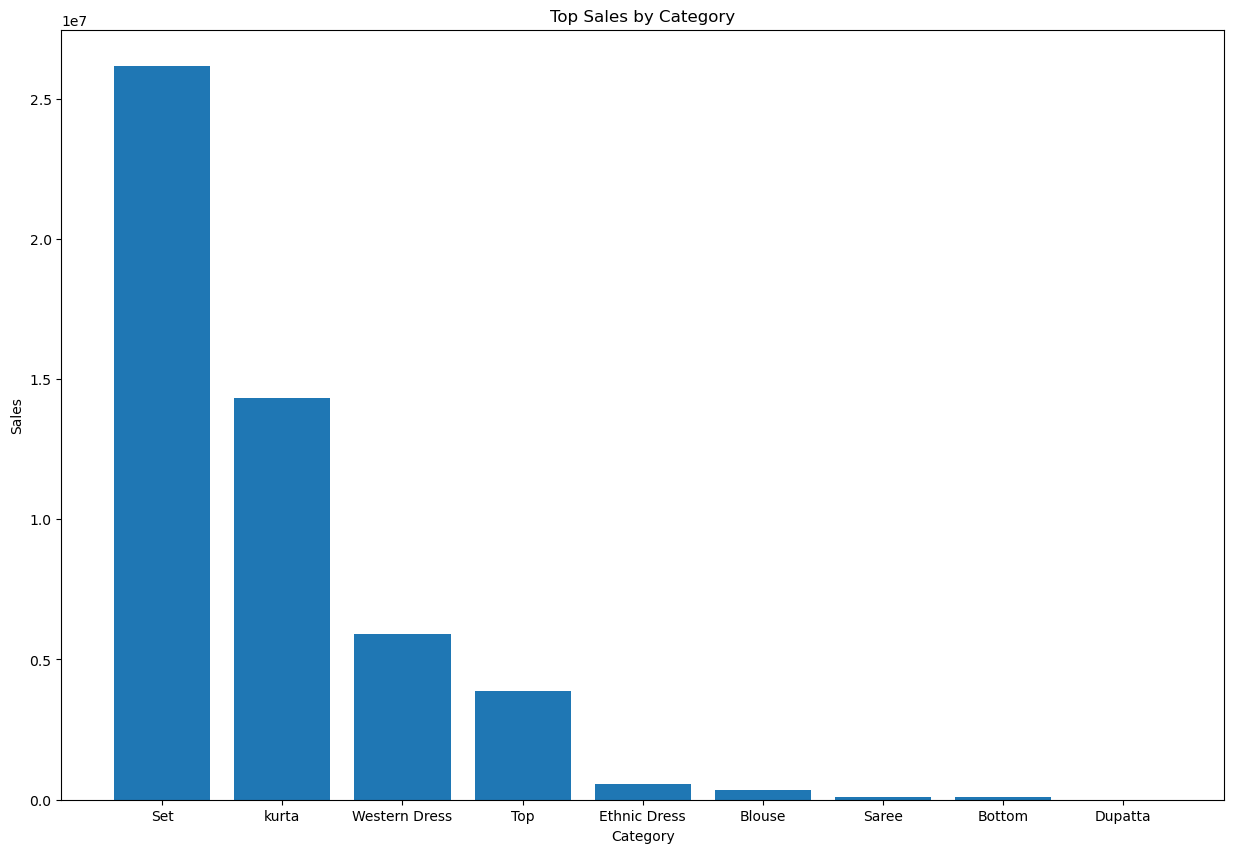

In [20]:
data_category = data[['category', 'sales']].groupby('category').sum().sort_values('sales', ascending=False)
data_category = data_category.reset_index()

plt.figure(figsize=(15, 10))
plt.bar(data_category['category'], data_category['sales'])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Top Sales by Category')
plt.show()

The `Set` category is the top-selling product category, followed by `Kurta` and `Western Dress`. On the other hand, `Dupatta` is the least popular category.

### Distribution of Products Sold by Category and Size

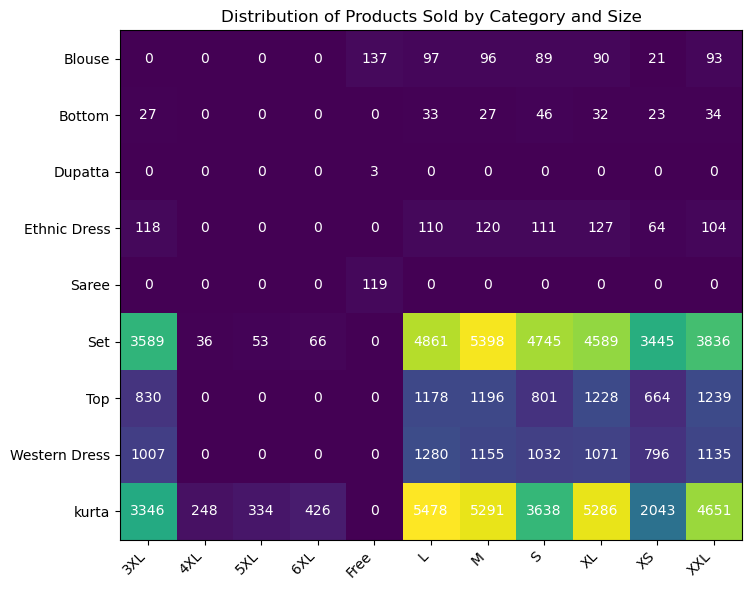

In [21]:
# Step 1: Count product based on its category and size jumlah produk berdasarkan category dan size
data_cat_size = data.groupby(['category', 'size'])['amazon_standard_id'].count().unstack(fill_value=0)

# Step 2: Buat plot
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(data_cat_size.values)

# Step 3: Set ticks dan label-nya
ax.set_xticks(range(len(data_cat_size.columns)))
ax.set_xticklabels(data_cat_size.columns, rotation=45, ha="right")

ax.set_yticks(range(len(data_cat_size.index)))
ax.set_yticklabels(data_cat_size.index)

# Step 4: Tambahkan label di tiap sel
for i in range(len(data_cat_size.index)):
    for j in range(len(data_cat_size.columns)):
        text = ax.text(j, i, data_cat_size.values[i, j],
                       ha="center", va="center", color="w")

# Step 5: Judul dan layout
ax.set_title("Distribution of Products Sold by Category and Size")
fig.tight_layout()
plt.show()


`Set` as the top-selling product category sold the most at size M, followed by L and S. There is no free size in this product category.
`Kurta` sold the most at L, followed by M and XL and similar with `Set`, there is no free size in this product category.
`Dupatta` only sold at 3 in free size.

### Distribution of Promotion Used

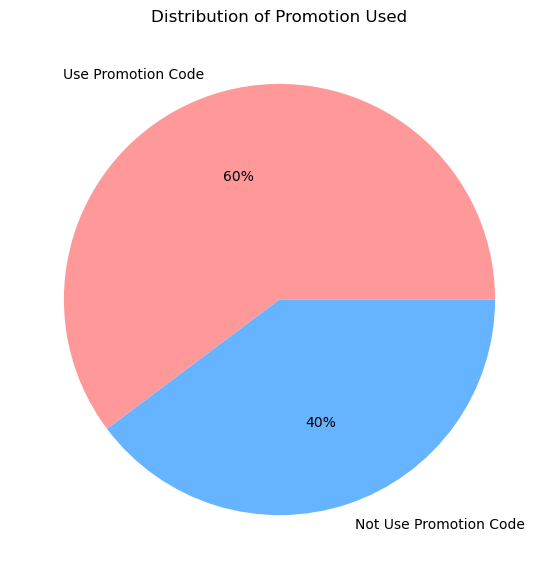

In [22]:
data_pie = data['promotion_used'].value_counts()
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data_pie, labels=data_pie.index.map({True: 'Use Promotion Code', False: 'Not Use Promotion Code'}), autopct='%.0f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Promotion Used')
# show plot
plt.show()

Most of our customers tends to use promotion code when buying our products, while only 40% decided to not use promotion code.

### Top 5 High Spending Customer

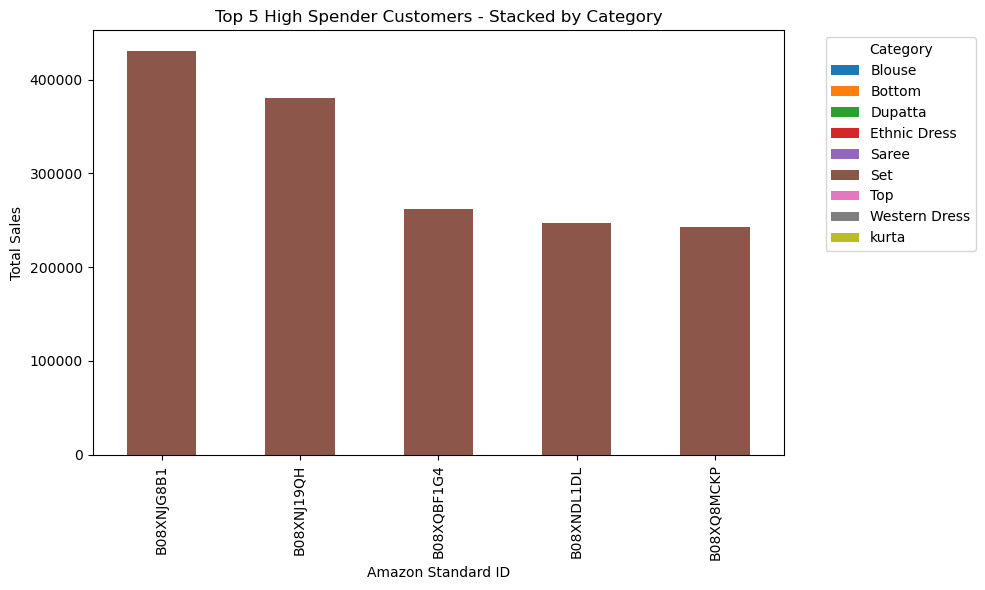

In [23]:
data_spend = data.groupby(['amazon_standard_id', 'category'])['sales'].sum().unstack(fill_value=0)

top5_spender = data_spend.loc[data_spend.sum(axis=1).sort_values(ascending=False).head(5).index]

top5_spender.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 5 High Spender Customers - Stacked by Category')
plt.xlabel('Amazon Standard ID')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Based on the chart above, even when displayed as a stacked bar chart, only one color (brown, representing the 'Set' category) is visible. This could indicate two things: (1) the 'Set' category is either the most expensive or the most preferred product, or (2) high-spending customers tend to favor the 'Set' category.